<a href="https://colab.research.google.com/github/kenjihiranabe/data-science-exercise/blob/main/PCA_excersise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA による次元削減をやってみた．

国語，数学，理科，社会，の試験の点数を分析し，次元削減したい． ４特徴から２特徴へ

## 出典
- 出典： https://qiita.com/kenTee/items/d2ea77afc98eeb0b0b3c
- 東京大学 森 純一郎先生の授業「データマイニング入門」

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import seaborn as sns

# 国語，数学，社会，理科，の点数，https://github.com/nakaikento/PCA_student_score より先頭の41データ．
data_string = io.StringIO(
'''\
KOKU,SHA,SU,RI
30,43,51,63
39,21,49,56
29,30,23,57
95,87,77,100
70,71,78,67
67,53,56,61
29,26,44,52
56,54,37,59
45,21,7,44
68,41,29,81
50,43,80,73
70,61,61,71
46,37,36,56
23,24,20,36
77,54,58,84
15,8,22,29
37,23,23,32
55,42,85,86
0,5,0,24
35,48,24,42
60,80,64,72
70,52,75,60
82,84,86,88
44,22,18,13
54,14,33,43
80,63,59,73
46,47,72,56
48,63,72,83
51,41,63,60
37,18,38,51
31,29,28,36
35,52,40,65
50,41,50,64
33,28,65,43
27,20,17,29
36,27,62,58
77,70,91,72
61,49,71,71
84,90,87,100
78,43,59,55
7,17,18,27
''')

# 教科ごとのデータ
df = pd.read_csv(data_string)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   KOKU    41 non-null     int64
 1   SHA     41 non-null     int64
 2   SU      41 non-null     int64
 3   RI      41 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


各データの雰囲気はこんな感じ

In [ ]:
df.head()

,KOKU,SHA,SU,RI
0,30,43,51,63
1,39,21,49,56
2,29,30,23,57
3,95,87,77,100
4,70,71,78,67


何はなくとも describe で概況を．

In [ ]:
df.describe()

,KOKU,SHA,SU,RI
count,41.000000,41.000000,41.000000,41.000000
mean,49.439024,42.487805,49.463415,58.341463
std,22.029581,21.849625,24.641528,20.556763
min,0.000000,5.000000,0.000000,13.000000
25%,35.000000,24.000000,28.000000,43.000000
50%,48.000000,42.000000,51.000000,59.000000
75%,68.000000,54.000000,71.000000,72.000000
max,95.000000,90.000000,91.000000,100.000000


まず，ヒストグラム書いてみる

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d85e5e50>,
      dtype=object)

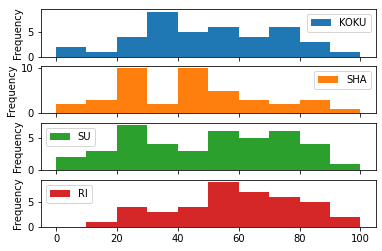

In [ ]:
df.plot(kind="hist",subplots=True)

みんな大好き，バイオリンプロット！

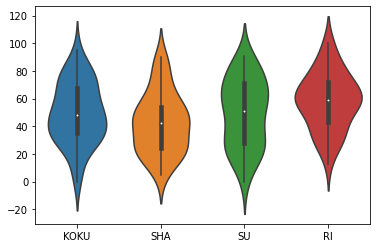

In [ ]:
sns.violinplot(data=df)

気づき

* 4分位点が表示される（箱ひげ図が内蔵）
* バイオリンプロットだと，曲線で繋ぐので，データが少ない谷間がみえないことがある． -20 なんて数字が出てくる．
* これは，記述統計でなく推測統計の場合の母集団がある，と考えたときの推定になっている．（カーネル密度推定）




相関見てみる（Dataframe#corr())． seaborn のヒートマップ．

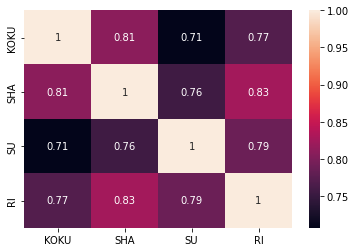

In [ ]:
# 相関係数を計算
correlation = df.corr()
# seabornのヒートマップを使って綺麗に表示
sns.heatmap(correlation, annot=True)

何が言える？ 何と何の相関が高い？　．．．．みんなで考える．思い通りになってるか？

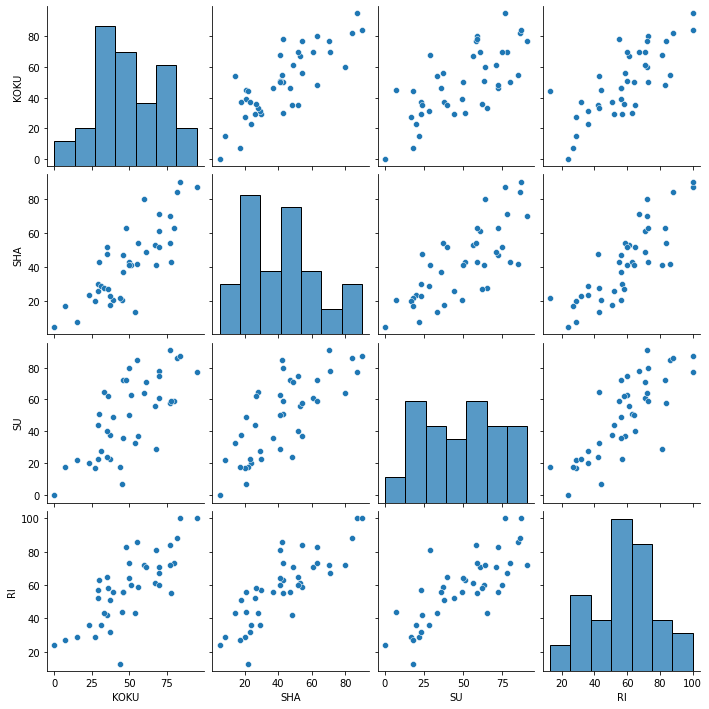

In [ ]:
sns.pairplot(df)

ん？ なに？ みんな正の相関高いじゃん！
そこで，PCAの出番ですよ．

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#score_array = df.values
score_feature = pca.fit_transform(df)
print("-----------PC-----------------")
pca_df = pd.DataFrame(score_feature)
pca_df.head()

-----------PC-----------------


,0,1
0,6.166667,-12.001179
1,17.090908,-11.865527
2,31.267374,5.165646
3,-78.723445,17.834083
4,-43.834520,-1.951296


In [ ]:
print("---------学科---------")
df.head()

---------学科---------


,KOKU,SHA,SU,RI
0,30,43,51,63
1,39,21,49,56
2,29,30,23,57
3,95,87,77,100
4,70,71,78,67


PC1, PC2 で散布図書いてみる．

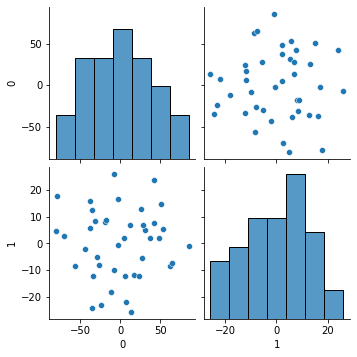

In [ ]:
sns.pairplot(pca_df)

なんやわからん．仮説を入れてみる．
文系と理系で傾向でないか？

Science と Art(ちなみに，英語でこういう．)

- 自然についての学問が Science
- 人が作ったものについての学問が Art

In [ ]:
# Art(文系) or Science(理系) 
def art_or_science(df):
    return df['KOKU'] + df['SHA'] - df['SU'] - df['RI'] > 0


pca_df['SA'] = df['SA'] = np.where(art_or_science(df), 'A', 'S')

In [ ]:

df.head()

,KOKU,SHA,SU,RI,SA
0,30,43,51,63,S
1,39,21,49,56,S
2,29,30,23,57,S
3,95,87,77,100,A
4,70,71,78,67,S


In [ ]:
pca_df.head()

,0,1,SA
0,6.166667,-12.001179,S
1,17.090908,-11.865527,S
2,31.267374,5.165646,S
3,-78.723445,17.834083,A
4,-43.834520,-1.951296,S


Text(0.5, 0.98, 'Science or Art, ZAKKURI')

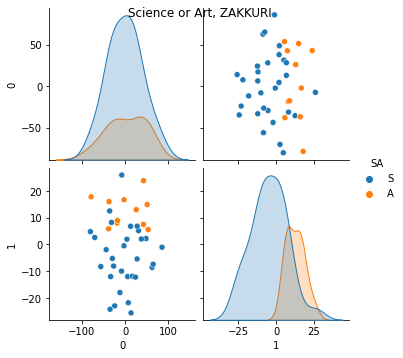

In [ ]:
g = sns.pairplot(pca_df, hue = 'SA')
g.fig.suptitle('Science or Art, ZAKKURI')

そうか！第一の主要因は．．．．！
ではそれで分類してみる．


Text(0.5, 0.98, 'High or Low, ZAKKURI')

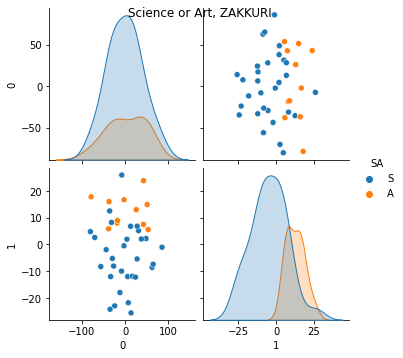

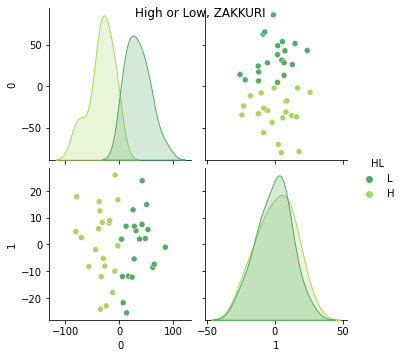

In [ ]:
def high_or_low(df):
  return df['KOKU'] + df['SHA'] + df['SU'] + df['RI'] > 200

df.drop(columns='HL', inplace=True, errors='ignore')
pca_df['HL']=df['HL'] = np.where(high_or_low(df), 'H', 'L')

g = sns.pairplot(pca_df, hue = 'SA')
g.fig.suptitle("Science or Art, ZAKKURI")
g = sns.pairplot(pca_df, hue = 'HL', palette='summer')
g.fig.suptitle("High or Low, ZAKKURI")


In [ ]:
# 分離分割をより鮮明になるか？偏差値にする．
def mean_norm(df_in):
    return df_in.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df.drop(columns='SA', inplace=True, errors='ignore')
df.drop(columns='HL', inplace=True, errors='ignore')

df_std = mean_norm(df.copy())
score_feature = pca.fit_transform(df_std)
pca_df_std = pd.DataFrame(score_feature)

def art_or_science_std(df):
  return art_or_science(df)

def high_or_low_std(df):
  return df['KOKU'] + df['SHA'] + df['SU'] + df['RI'] > 0

pca_df_std['SA'] = df_std['SA'] = np.where(art_or_science_std(df_std), 'A', 'S')
pca_df_std['HL'] = df_std['HL'] = np.where(high_or_low_std(df_std), 'H', 'L')


In [ ]:
df_std.head()

,0,1,SA,HL
0,0.277902,0.612237,S,L
1,0.802475,0.500246,S,L
2,1.305866,-0.094360,S,L
3,-3.635351,-0.673145,A,H
4,-1.904676,0.022217,A,H


In [ ]:
pca_df_std.head()

,0,1,SA,HL
0,0.277902,0.612237,S,L
1,0.802475,0.500246,S,L
2,1.305866,-0.094360,S,L
3,-3.635351,-0.673145,A,H
4,-1.904676,0.022217,A,H


Text(0.5, 0.98, 'Science or Art(STD)')

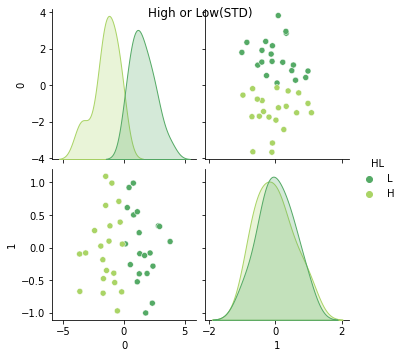

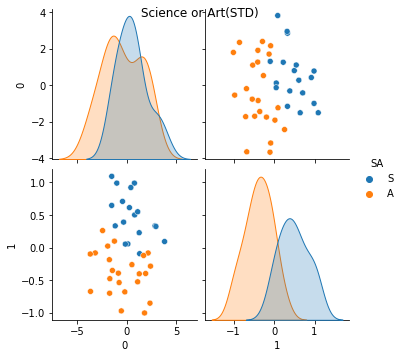

In [ ]:
#再度挑戦

g = sns.pairplot(pca_df_std, hue = 'HL', palette='summer')
g.fig.suptitle("High or Low(STD)")
g = sns.pairplot(pca_df_std, hue = 'SA')
g.fig.suptitle("Science or Art(STD)")


# おお，よりシャープに，文理を分離できた！

- あくまでLH, SAは人間がつけたラベルであることに注意．PC0,PC1の本当の意味は純粋にデータ的．
- 偏差値でやった場合に， HL の分布が同じに見える，，，，バグの可能性．誰か見つけて！

# 統計学からの反論

- ふたこぶが見えた段階で，特徴量が足らない．調査を見直すべき．例えば「男女」．これをデータに追加する再調査をする必要がある．